In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 10)

# 0.Data Load
---

In [2]:
df_pr = pd.read_csv("../LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv", low_memory=False)
df_pr.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [3]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381743 entries, 0 to 4381742
Data columns (total 10 columns):
 #   Column   Dtype  
---  ------   -----  
 0   cust     object 
 1   rct_no   object 
 2   chnl_dv  int64  
 3   cop_c    object 
 4   br_c     object 
 5   pd_c     object 
 6   de_dt    int64  
 7   de_hr    int64  
 8   buy_am   float64
 9   buy_ct   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 334.3+ MB


In [4]:
# Number of Unique Values
for col in df_pr.columns:
    unq_arr = df_pr[col].unique()
    print(f"{col}: {df_pr[col].nunique()}\t{['*']+unq_arr[:10].tolist() if df_pr[col].nunique()>20 else unq_arr}")
    print()
print(f"Total DF Length: {len(df_pr)}")

cust: 26917	['*', 'M430112881', 'M646853852', 'M669384418', 'M886923095', 'M707991383', 'M117855953', 'M641274652', 'M625839441', 'M284446967', 'M401266932']

rct_no: 1266589	['*', 'A01000001113', 'A01000002265', 'A01000003148', 'A01000004946', 'A01000005297', 'A01000006470', 'A01000007648', 'A01000008296', 'A01000009771', 'A01000010063']

chnl_dv: 2	[1 2]

cop_c: 6	['A01' 'A02' 'A03' 'A04' 'A05' 'A06']

br_c: 6755	['*', 'A010039', 'A010025', 'A010053', 'A010049', 'A010024', 'A010045', 'A010035', 'A010052', 'A010002', 'A010032']

pd_c: 1933	['*', 'PD0290', 'PD1369', 'PD1692', 'PD0620', 'PD0252', 'PD0958', 'PD0951', 'PD1181', 'PD0900', 'PD0292']

de_dt: 365	['*', 20210101, 20210102, 20210103, 20210104, 20210105, 20210106, 20210107, 20210108, 20210109, 20210110]

de_hr: 24	['*', 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

buy_am: 33791	['*', 15000.0, 79700.0, 19000.0, 9900.0, 10000.0, 49000.0, 310000.0, 49500.0, 5200.0, 159000.0]

buy_ct: 85	['*', 1, 3, 2, 6, 4, 5, 8, 15, 10, 16]

Total DF 

In [5]:
df_pr.isna().sum()

cust            0
rct_no          0
chnl_dv         0
cop_c           0
br_c       428501
pd_c            0
de_dt           0
de_hr           0
buy_am          0
buy_ct          0
dtype: int64

- PK를 찾을 수 없음
- 유통사만 존재하는 데이터 세트
- 상품 코드가 존재 (즉 상품 데이터 세트는 유통사의 한해서 존재하는 상품)
- 그렇다면, `cust`와 `rct_no`가 혼합된 combination key일 가능성이 존재

# 1.Find PK
---

In [6]:
df_pr.sort_values("rct_no",ascending=False).head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
4381742,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


- 중복 레코드 다수 존재

In [7]:
df_pr.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4144389 entries, 0 to 4381733
Data columns (total 10 columns):
 #   Column   Dtype  
---  ------   -----  
 0   cust     object 
 1   rct_no   object 
 2   chnl_dv  int64  
 3   cop_c    object 
 4   br_c     object 
 5   pd_c     object 
 6   de_dt    int64  
 7   de_hr    int64  
 8   buy_am   float64
 9   buy_ct   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 347.8+ MB


In [8]:
print(df_pr.drop_duplicates()["cust"].nunique())
print(df_pr.drop_duplicates()["rct_no"].nunique())

26917
1266589


In [9]:
df_pr.duplicated().sum()

237354

In [10]:
df_ndup = df_pr.drop_duplicates().reset_index(drop=True)
for col in df_ndup.columns:
    val = df_ndup[col].nunique()
    total = len(df_ndup)
    if col=="chnl_dv":
        print(f"{col}:\t{val} ({np.round(total/val, 2)})")
    else:
        print(f"{col}:\t\t{val} ({np.round(total/val, 2)})")
print(f"\ntotal:\t\t{len(df_ndup)}")

cust:		26917 (153.97)
rct_no:		1266589 (3.27)
chnl_dv:	2 (2072194.5)
cop_c:		6 (690731.5)
br_c:		6755 (613.53)
pd_c:		1933 (2144.02)
de_dt:		365 (11354.49)
de_hr:		24 (172682.88)
buy_am:		33791 (122.65)
buy_ct:		85 (48757.52)

total:		4144389


In [11]:
df_ndup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4144389 entries, 0 to 4144388
Data columns (total 10 columns):
 #   Column   Dtype  
---  ------   -----  
 0   cust     object 
 1   rct_no   object 
 2   chnl_dv  int64  
 3   cop_c    object 
 4   br_c     object 
 5   pd_c     object 
 6   de_dt    int64  
 7   de_hr    int64  
 8   buy_am   float64
 9   buy_ct   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 316.2+ MB


In [12]:
for col in df_ndup.columns:
    if col=="rct_no": continue
    df_temp = df_ndup[["rct_no"]+[col]].drop_duplicates()
    print(f"{df_temp.columns.tolist()}\t{len(df_temp)}")

['rct_no', 'cust']	1266589
['rct_no', 'chnl_dv']	1266589
['rct_no', 'cop_c']	1266589
['rct_no', 'br_c']	1266589
['rct_no', 'pd_c']	3728554
['rct_no', 'de_dt']	1266589
['rct_no', 'de_hr']	1266589
['rct_no', 'buy_am']	3953337
['rct_no', 'buy_ct']	1651418


In [13]:
cols_list = ["rct_no"]
for col in df_ndup.columns:
    if col=="rct_no": continue
    cols_list+=[col]
    df_temp = df_ndup[cols_list].drop_duplicates()
    print(f"{len(df_temp)}\t{df_temp.columns.tolist()}")

1266589	['rct_no', 'cust']
1266589	['rct_no', 'cust', 'chnl_dv']
1266589	['rct_no', 'cust', 'chnl_dv', 'cop_c']
1266589	['rct_no', 'cust', 'chnl_dv', 'cop_c', 'br_c']
3728554	['rct_no', 'cust', 'chnl_dv', 'cop_c', 'br_c', 'pd_c']
3728554	['rct_no', 'cust', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt']
3728554	['rct_no', 'cust', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr']
4132188	['rct_no', 'cust', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr', 'buy_am']
4144389	['rct_no', 'cust', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr', 'buy_am', 'buy_ct']


In [14]:
df_ndup[["rct_no","buy_am","buy_ct"]]

,rct_no,buy_am,buy_ct
0,A01000001113,15000.0,1
1,A01000002265,79700.0,1
2,A01000003148,19000.0,1
3,A01000004946,19000.0,1
4,A01000005297,9900.0,1
...,...,...,...
4144384,E06052115831,50000.0,1
4144385,E06052116037,10000.0,1
4144386,E06052117103,289000.0,1
4144387,E06052118403,200000.0,1


***구매 내역 데이터에 대한 고찰***

- 기존 데이터 프레임에는 중복이 존재함 (의도된 중복인지, 의도되지 않은 중복인지 의미를 파악할 필요가 있음)
- 기존 데이터의 중복을 제거한 후에 key의 역할을 맡는 것은 `rct_no`, `buy_am`, `buy_ct` 세 가지의 combination key로 동작함

# 2.`br_c` NaN 탐색
---

In [15]:
df_ndup.loc[df_ndup["br_c"].isna()]

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
401,M533330698,E01000012036,2,A01,NaN,PD0954,20210101,1,39000.0,1
402,M661395471,E01000013847,2,A01,NaN,PD1706,20210101,10,168000.0,1
403,M594992791,E01000014987,2,A01,NaN,PD1810,20210101,11,30000.0,1
404,M263406446,E01000015117,2,A01,NaN,PD0302,20210101,12,335000.0,1
405,M182645944,E01000016766,2,A01,NaN,PD1782,20210101,13,107100.0,1
...,...,...,...,...,...,...,...,...,...,...
4144384,M816318679,E06052115831,2,A06,NaN,PD0507,20211231,22,50000.0,1
4144385,M816318679,E06052116037,2,A06,NaN,PD0507,20211231,22,10000.0,1
4144386,M182645944,E06052117103,2,A06,NaN,PD0294,20211231,23,289000.0,1
4144387,M533286446,E06052118403,2,A06,NaN,PD0507,20211231,23,200000.0,1


## 2.1.각 유통사가 판매하는 품목
---

In [16]:
df_prod = pd.read_csv("../LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv")
df_prod.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [17]:
df_ndup.drop_duplicates(subset=["cop_c","pd_c"])

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
4,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900.0,1
5,M430112881,A01000006470,1,A01,A010039,PD0620,20210101,11,10000.0,1
6,M430112881,A01000007648,1,A01,A010039,PD0252,20210101,11,49000.0,1
...,...,...,...,...,...,...,...,...,...,...
4141538,M632433493,E06049767352,2,A06,NaN,PD1735,20211108,1,78400.0,1
4142177,M531771523,E06050307847,2,A06,NaN,PD1630,20211117,11,1360.0,2
4142448,M593485709,E06050539438,2,A06,NaN,PD0810,20211123,21,35000.0,1
4142569,M918705590,E06050609606,2,A06,NaN,PD1434,20211125,10,19000.0,1


In [18]:
pd.set_option("display.max_columns", None)
df_prd_prch = pd.merge(left=df_ndup.drop_duplicates(subset=["cop_c","pd_c"]), right=df_prod, how="left", on="pd_c", right_index=False)
df_prd_prch.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900.0,1,커피/음료,테넌트/음식점,식당
3,M430112881,A01000006470,1,A01,A010039,PD0620,20210101,11,10000.0,1,남성일반양말,속옷/양말/홈웨어,남성양말류
4,M430112881,A01000007648,1,A01,A010039,PD0252,20210101,11,49000.0,1,기타구기/필드스포츠용품,구기/필드스포츠,기타구기/필드스포츠


In [19]:
df_temp = pd.pivot_table(data=df_prd_prch,
               values="buy_ct",
               index="clac_hlv_nm",
               # index="clac_mcls_nm",
               # index="pd_nm",
               columns="cop_c",
               aggfunc="count")

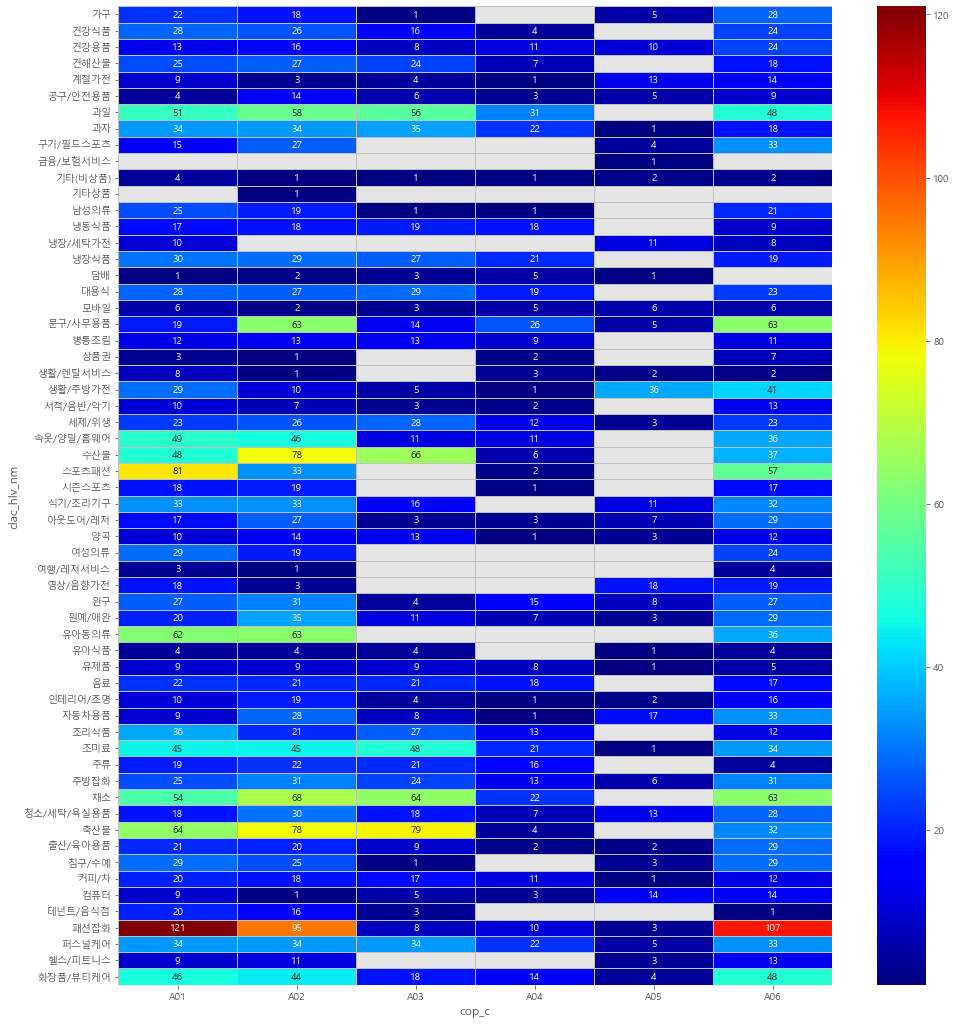

In [20]:
plt.figure(figsize=(16,18))
sns.heatmap(data=df_temp,
            annot=True,
            fmt = ".0f",
            cmap = "jet",
            linecolor = "silver",
            linewidths = .5)
plt.show()

# 2.2.가장 많이 판매하는 품목
---

In [22]:
df_prd_prch.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900.0,1,커피/음료,테넌트/음식점,식당
3,M430112881,A01000006470,1,A01,A010039,PD0620,20210101,11,10000.0,1,남성일반양말,속옷/양말/홈웨어,남성양말류
4,M430112881,A01000007648,1,A01,A010039,PD0252,20210101,11,49000.0,1,기타구기/필드스포츠용품,구기/필드스포츠,기타구기/필드스포츠


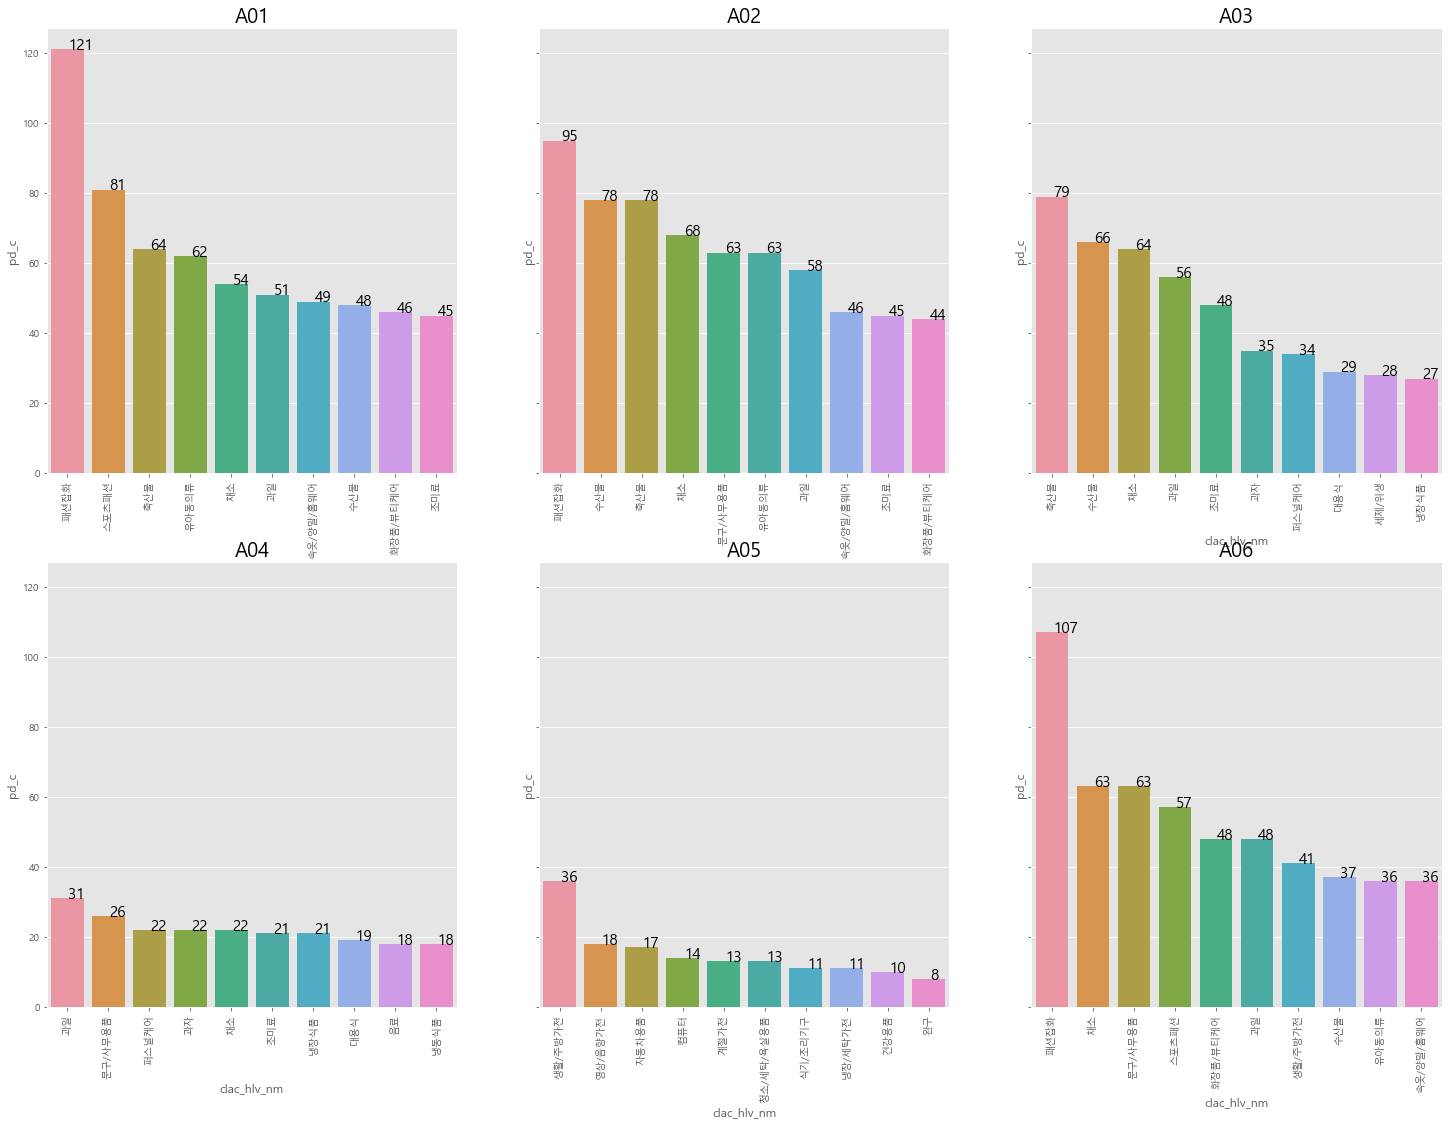

In [34]:
df_pr_group = df_prd_prch.groupby(by=["cop_c","clac_hlv_nm"], as_index=False)["pd_c"].count()
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(25,18))
for i,distr in enumerate(df_prd_prch["cop_c"].unique()):
    df_temp = df_pr_group.loc[df_pr_group["cop_c"]==distr].sort_values(by="pd_c",ascending=False).iloc[:10,1:]
    sns.barplot(x=df_temp["clac_hlv_nm"], y=df_temp["pd_c"], ax=ax[i//3][i%3])
    x_loc = 0.03
    for pdc in df_temp["pd_c"]:
        ax[i//3][i%3].text(x=x_loc, y=pdc, s=f"{pdc}", size=15)
        x_loc+=1
    ax[i//3][i%3].set_xticklabels(labels=df_temp["clac_hlv_nm"], rotation=90)
    ax[i//3][i%3].set_title(f"{distr}", size=20)
plt.show()